# Colab 사용 or 본인 GPU 사용(torch와 쿠다 버전 맞춰야함!!)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


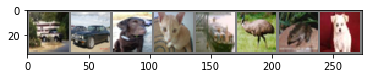

truck   car   dog   cat  ship  bird  frog   dog


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
model = torchvision.models.resnet50(pretrained=True).to(device) #device 가 GPU이기 때문에 GPU 연산 가능
# True일 경우 ImageNet 구조 가져옴

In [7]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

In [9]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# 불러온 특정 layer update 막기

In [21]:
# 1번
i = 0
for name, param in model.named_parameters():
    i +=1
    print(i, name)
    param.requires_grad = False
    if i == 159:
        break

1 conv1.weight
2 bn1.weight
3 bn1.bias
4 layer1.0.conv1.weight
5 layer1.0.bn1.weight
6 layer1.0.bn1.bias
7 layer1.0.conv2.weight
8 layer1.0.bn2.weight
9 layer1.0.bn2.bias
10 layer1.0.conv3.weight
11 layer1.0.bn3.weight
12 layer1.0.bn3.bias
13 layer1.0.downsample.0.weight
14 layer1.0.downsample.1.weight
15 layer1.0.downsample.1.bias
16 layer1.1.conv1.weight
17 layer1.1.bn1.weight
18 layer1.1.bn1.bias
19 layer1.1.conv2.weight
20 layer1.1.bn2.weight
21 layer1.1.bn2.bias
22 layer1.1.conv3.weight
23 layer1.1.bn3.weight
24 layer1.1.bn3.bias
25 layer1.2.conv1.weight
26 layer1.2.bn1.weight
27 layer1.2.bn1.bias
28 layer1.2.conv2.weight
29 layer1.2.bn2.weight
30 layer1.2.bn2.bias
31 layer1.2.conv3.weight
32 layer1.2.bn3.weight
33 layer1.2.bn3.bias
34 layer2.0.conv1.weight
35 layer2.0.bn1.weight
36 layer2.0.bn1.bias
37 layer2.0.conv2.weight
38 layer2.0.bn2.weight
39 layer2.0.bn2.bias
40 layer2.0.conv3.weight
41 layer2.0.bn3.weight
42 layer2.0.bn3.bias
43 layer2.0.downsample.0.weight
44 layer2.0.d

In [23]:
# 2번
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True

In [24]:
# 3번
model.layer2[0].conv3.requires_grad = False
model.layer3.requires_grad = False

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [11]:
old_loss = 3
PATH = './cifar_model.pth'

for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        
    cost = running_loss / len(trainloader)
    print('[%d] loss: %.3f' %(epoch +1, cost))
    if cost < old_loss:
        print("Save the best model")
        torch.save(model.state_dict(), PATH)
        old_loss = cost

print('Finished Training')

[1] loss: 2.096
Save the best model
[2] loss: 1.614
Save the best model
Finished Training


In [12]:
# model = torchvision.models.resnet50(pretrained=True).to(device)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('ACccuracy of the model on the 10000 test images : %d %%' %(100 * correct /total))

ACccuracy of the model on the 10000 test images : 49 %


In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 61 %
Accuracy of  bird : 14 %
Accuracy of   cat : 28 %
Accuracy of  deer : 61 %
Accuracy of   dog : 37 %
Accuracy of  frog : 47 %
Accuracy of horse : 55 %
Accuracy of  ship : 61 %
Accuracy of truck : 58 %
